# Points to Remember

* When there is non-mutually exclusive classification, use sigmoid function for output         layer.

* When there is mutually exclusive classification, use softmax function as it assigns         probabilities to each class, that when summed together, yield 1.

* For classification problems, we use cross entropy loss function.

## How it works inside a neural network

* Using input **x**,  
    * z = wx + b
    * a = sigmoid(z)
 
* Basically, feed input to first layer, and calculate z value. Pass this z value into sigmoid function to get a. This **a** value is what becomes the input to the next layer of neurons.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [74]:
df = pd.read_csv('~/Documents/Deep Learning Masterclass/DATA/fake_reg.csv')

# Goal is to predict price for a given values of features

In [75]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [98]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building a Model

* Dense: Every neuron in layer L is connected to every other neuron in layer L+1
* Number of neurons in last layer = number of possibilities of output.

## Remember

The loss values are to be passed to compile() method.

* Multi-class classification: loss = 'catagorical_crossentropy'
* Binary classification: loss = 'binary_crossentropy'
* Regression: loss = 'mse'

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(4, 'relu'), # 4: Number of neurons we want
    Dense(2, 'relu'),
    Dense(1)
])

# OR

model = Sequential()

model.add(Dense(4, 'relu'))
model.add(Dense(4, 'relu'))
model.add(Dense(4, 'relu'))
model.add(Dense(1)) # Only one possibility, the price

# Configures model for training
model.compile(optimizer='adam', loss='mse')

In [104]:
model.fit(X_train, y_train, epochs=250, verbose=0)

<AxesSubplot:>

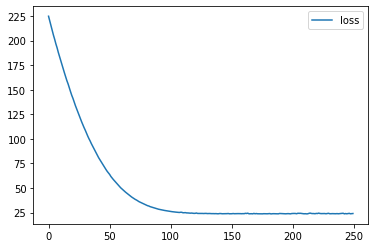

In [105]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# Evaluating Model's Performance

In [106]:
model.evaluate(X_test, y_test, verbose=0)
# Returns back the model's loss in accordance with same metric loss as you specified in compile()

25.111963272094727

In [107]:
predictions = model.predict(X_test)
predictions = pd.Series(predictions.reshape(300, ))

In [126]:
predictions_df = pd.DataFrame(data=y_test.values)
predictions_df = pd.concat([predictions_df, predictions], axis=1)
predictions_df.columns = ['Actual Values', 'Predictions']

In [127]:
predictions_df

,Actual Values,Predictions
0,402.296319,405.472443
1,624.156198,623.952881
2,582.455066,592.515137
3,578.588606,572.577881
4,371.224104,366.744202
...,...,...
295,525.704657,529.352051
296,502.909473,515.607178
297,612.727910,610.051880
298,417.569725,417.156799


<AxesSubplot:xlabel='Actual Values', ylabel='Predictions'>

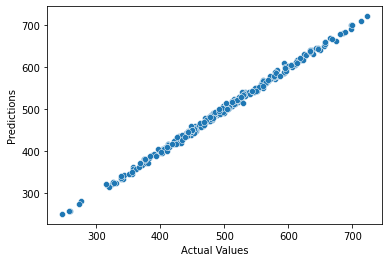

In [130]:
sbn.scatterplot(x=predictions_df['Actual Values'], y=predictions_df['Predictions'])

In [132]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(
    mean_squared_error(predictions_df['Actual Values'], predictions_df['Predictions'])
)
RMSE

5.011183943687169

# Predicting New Values

In [135]:
new_gem = [[998, 1000]]
new_gem = scaler.transform(new_gem)

In [138]:
expected_price = model.predict(new_gem)
expected_price

array([[419.87134]], dtype=float32)

# Saving Model

In [ ]:
from tensorflow.keras.models import load_model

model.save('my_gem_model.h5')

loaded_model = load_model('my_gem_model.h5')

# loaded_model.predict()...